In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

## ACF

ACF or Autocorrelation Function is show the correlation between time series with its own lagged values. For instance if we are using lag = 4 we calculate the correlation between Ht with Ht-4, the correlation estimated at every lag and plotted wit show the correlation of each instance with its own lagged value. You can use both Pearson or Spearman correlation to estimate the correlation.

In [3]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv')

In [4]:
df.shape

(2956, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Lets just take the Close column

In [6]:
columns_keep = ['Date','Close']

In [7]:
df = df[columns_keep]

In [8]:
df.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [9]:
df.shape

(2956, 2)

Let's just take a few data record for example

In [10]:
df = df.head(15)

In [11]:
df.shape

(15, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15 non-null     object 
 1   Close   15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [14]:
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [15]:
df.tail()

,Close
Date,
2010-07-14,3.968
2010-07-15,3.978
2010-07-16,4.128
2010-07-19,4.382
2010-07-20,4.060


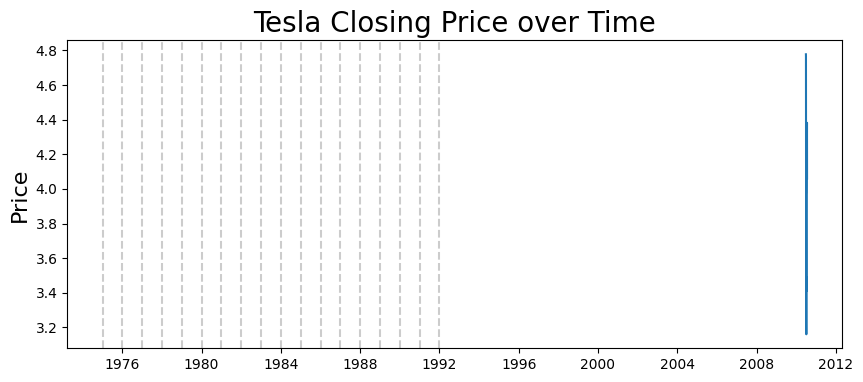

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'])
plt.title('Tesla Closing Price over Time', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2010-6-29,2020-7-20):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)